In [1]:
import sys
print(sys.executable)
print(sys.path)

C:\ProgramData\anaconda3\python.exe
['C:\\Users\\naidu', 'C:\\ProgramData\\anaconda3\\python312.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\Lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\Users\\naidu\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor']


In [2]:
import xgboost
print(xgboost.__version__)



3.0.5


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [4]:
#DATA COLLECTION & PROCESSING

In [5]:
 #Loading the data from csv file to a Pandas Dataframe
calories = pd.read_csv(r"C:\Users\naidu\Downloads\calories.csv")

In [6]:
#Print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
exercise_data = pd.read_csv(r"C:\Users\naidu\Downloads\exercise.csv")

In [8]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
#Combaining the two data sets

In [10]:
print(calories.columns)


Index(['User_ID', 'Calories'], dtype='object')


In [11]:
calories.columns = calories.columns.str.strip()


In [12]:
calories.columns = calories.columns.str.lower()


In [13]:
calories_data = pd.concat([exercise_data, calories['calories']], axis=1)


In [14]:
if 'calories' in calories.columns:
    # safe to access
    calories_data = pd.concat([exercise_data, calories['calories']], axis=1)
else:
    print("Column 'calories' not found.")


In [15]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
#checking the number of rows and columns
calories_data.shape

(15000, 9)

In [17]:
#getting some info about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [18]:
#checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
calories      0
dtype: int64

In [19]:
#DATA ANALYSIS

In [20]:
# Get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [21]:
#DATA VISUALISATION 

In [22]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

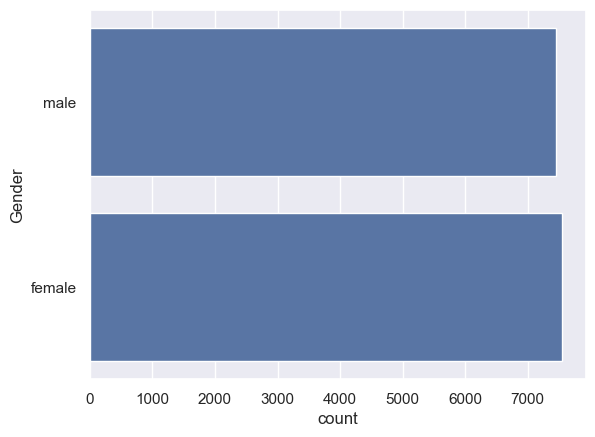

In [23]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

C:\Users\naidu\AppData\Local\Temp\ipykernel_16804\3367991676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

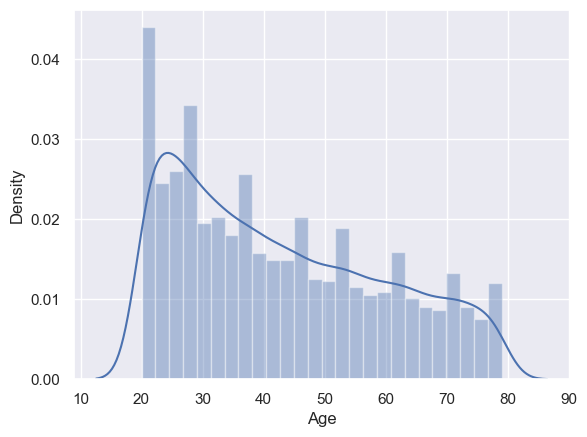

In [24]:
#finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

C:\Users\naidu\AppData\Local\Temp\ipykernel_16804\178982985.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

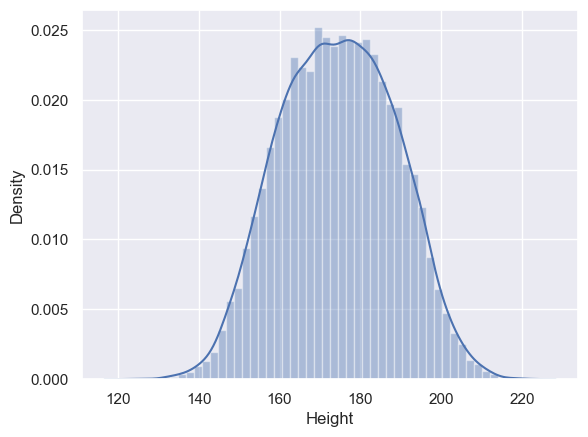

In [25]:
#finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

C:\Users\naidu\AppData\Local\Temp\ipykernel_16804\3057770523.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

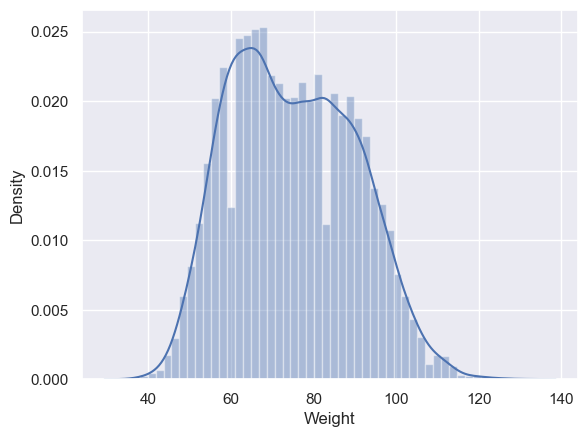

In [26]:
#finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

In [27]:
# FINDING THE CORRELATION IN THE DATASET

In [28]:
correlation = calories_data.corr(numeric_only=True)


<Axes: >

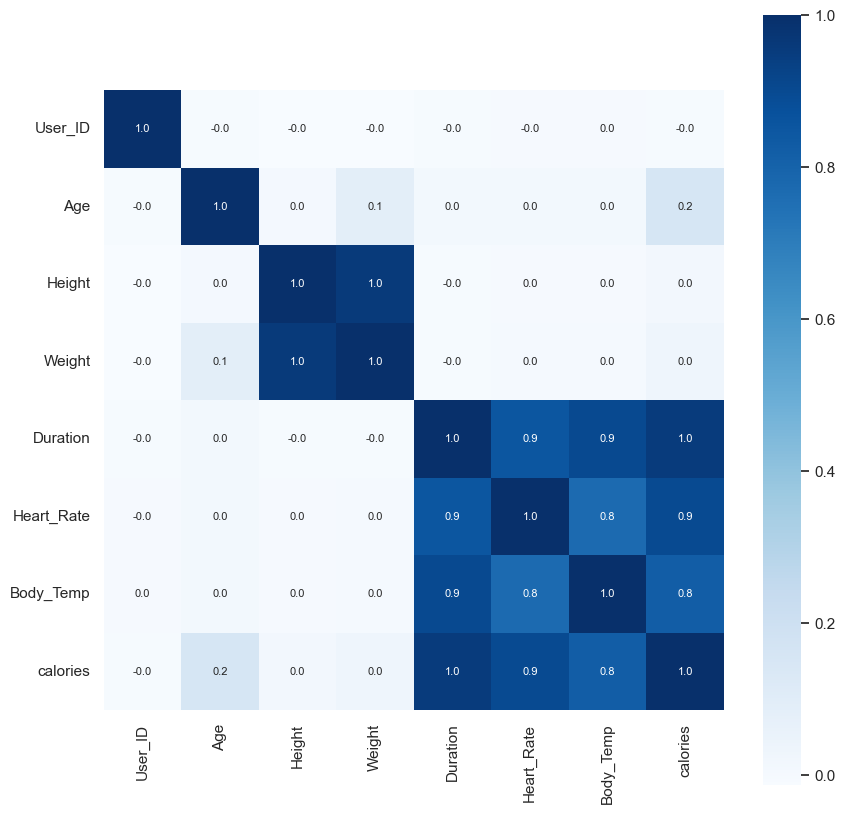

In [29]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')


In [30]:
 # converting the text data to numericals

In [31]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

C:\Users\naidu\AppData\Local\Temp\ipykernel_16804\2713499166.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [32]:
calories.head()


,user_id,calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [33]:
#SEPARATING FEATURES AND TARGET

In [34]:
X = calories_data.drop(columns=['User_ID','calories'],axis=1)
Y = calories_data['calories']

In [35]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [36]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: calories, Length: 15000, dtype: float64


In [37]:
#SPLITTING DATA INTO TRAINING DATA AND TESTING DATA

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape,X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [40]:
#MODEL TRAINING

In [41]:
#XGBOOST REGRESSOR

In [42]:
 #Loading the model
model = XGBRegressor()

In [43]:
#training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [44]:
#EVALUATION

In [45]:
#PREDICTION ON TEST DATA

In [46]:
test_data_prediction = model.predict(X_test)

In [48]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [49]:
#MEAN ABSOLUTE ERROR

In [50]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [51]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4833678883314132
